# TP 3

## Importaciones generales y cargo de csv's

In [1]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)

sns.set(style="whitegrid") # seteando tipo de grid en seaborn

pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import numpy as np
import time

## Modelo 2 - GradientBoostingClassifier

### Cargo los archivos ya encodeados

In [2]:
df_train = pd.read_csv("df_train_encodeado_completo (3).csv")
#df_test = pd.read_csv("df_test_encoding_completo.csv")

In [3]:
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543134,3530134,0,14327565,917.81,12544,321.00,150.00,226.00,184.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543135,3530135,0,14327595,26.95,12598,111.00,150.00,166.00,310.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543136,3530136,0,14327620,117.00,11919,170.00,150.00,224.00,204.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543137,3530137,0,14327620,102.00,12449,174.00,150.00,117.00,143.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [4]:
for i in df_train.columns: 
    promedio = 100*df_train[i].isnull().sum()/len(df_train[i])
    if (promedio > 0):
        print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

La columna C1 tiene 0.00018411493190509243 % de elementos nulos
La columna C2 tiene 0.00018411493190509243 % de elementos nulos
La columna C3 tiene 0.00018411493190509243 % de elementos nulos
La columna C4 tiene 0.00018411493190509243 % de elementos nulos
La columna C5 tiene 0.00018411493190509243 % de elementos nulos
La columna C6 tiene 0.00018411493190509243 % de elementos nulos
La columna C7 tiene 0.00018411493190509243 % de elementos nulos
La columna C8 tiene 0.00018411493190509243 % de elementos nulos
La columna C9 tiene 0.00018411493190509243 % de elementos nulos
La columna C10 tiene 0.00018411493190509243 % de elementos nulos
La columna C11 tiene 0.00018411493190509243 % de elementos nulos
La columna C12 tiene 0.00018411493190509243 % de elementos nulos
La columna C13 tiene 0.00018411493190509243 % de elementos nulos
La columna C14 tiene 0.00018411493190509243 % de elementos nulos
La columna D1 tiene 0.00018411493190509243 % de elementos nulos
La columna D2 tiene 0.0001841149319

In [5]:
df_train.fillna(0, inplace = True)
df_train

,TransactionID,isFraud,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,2987000,0,86400,68.50,13926,0.00,150.00,142.00,315.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2987001,0,86401,29.00,2755,404.00,150.00,102.00,325.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,2987002,0,86469,59.00,4663,490.00,150.00,166.00,330.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,2987003,0,86499,50.00,18132,567.00,150.00,117.00,476.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,2987004,0,86506,50.00,4497,514.00,150.00,102.00,420.00,87.00,...,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543134,3530134,0,14327565,917.81,12544,321.00,150.00,226.00,184.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543135,3530135,0,14327595,26.95,12598,111.00,150.00,166.00,310.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543136,3530136,0,14327620,117.00,11919,170.00,150.00,224.00,204.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
543137,3530137,0,14327620,102.00,12449,174.00,150.00,117.00,143.00,87.00,...,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [6]:
columnas = list(df_train.columns)
columnas;

In [7]:
columnas_sin_isFraud = columnas
columnas_sin_isFraud.remove('isFraud')
columnas_sin_isFraud;

In [8]:
columnas_sin_isFraud_y_sin_TransactionID = columnas_sin_isFraud
columnas_sin_isFraud_y_sin_TransactionID.remove('TransactionID')
columnas_sin_isFraud_y_sin_TransactionID;

### Entrenamiento

In [24]:
import numpy as np
import math
from tqdm import tqdm
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold

from sklearn.ensemble import GradientBoostingClassifier

from tqdm import tqdm

In [10]:
points = df_train[columnas_sin_isFraud_y_sin_TransactionID].values
points

array([[8.6400000e+04, 6.8500000e+01, 1.3926000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6401000e+04, 2.9000000e+01, 2.7550000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.6469000e+04, 5.9000000e+01, 4.6630000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.4327620e+07, 1.1700000e+02, 1.1919000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4327620e+07, 1.0200000e+02, 1.2449000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.4327647e+07, 1.7100000e+02, 8.3200000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [11]:
points.size/495

566181.2606060606

In [12]:
labels = df_train['isFraud'].values
labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

#### Separo en train y validation

In [13]:
X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size = 0.3, random_state = 0)

In [14]:
# X_train, X_test, y_train, y_test = train_test_split(points, labels, test_size=0.5)

In [15]:
X_train

array([[6.5261270e+06, 4.7950000e+01, 9.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.6338840e+06, 2.5419000e+01, 9.0260000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.2085851e+07, 5.9000000e+01, 7.9740000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [2.3078680e+06, 7.6023000e+01, 1.4037000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1032606e+07, 3.3100000e+02, 4.4360000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.5920600e+06, 4.7950000e+01, 1.7640000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [16]:
X_train.shape

(380197, 516)

In [17]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [18]:
y_train.shape

(380197,)

In [19]:
X_test

array([[1.3032888e+07, 1.1040000e+03, 1.6659000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [7.3410120e+06, 4.7950000e+01, 1.2797000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.0783470e+06, 1.2995000e+02, 9.5000000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7141590e+06, 1.7100000e+02, 6.8680000e+03, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [3.2785550e+06, 5.9000000e+01, 1.7188000e+04, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.5653570e+06, 3.0000000e+02, 9.8030000e+03, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00]])

In [20]:
X_test.shape

(162942, 516)

In [21]:
y_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
y_test.shape

(162942,)

#### GradientBoostingClassifier 1

In [58]:
gb_model_1 = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0, random_state=0, verbose=100)

In [59]:
gb_model_1.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1           0.3567           16.76m
         2          43.2802           16.21m
         3          43.3036           15.93m
         4         594.3605           15.57m
         5         594.3603           15.15m
         6         851.6548           14.83m
         7         851.6398           14.54m
         8         851.6061           14.24m
         9    16984320.6862           13.88m
        10    16984320.6825           13.54m
        11    16984320.6807           13.19m
        12    16984313.9951           12.86m
        13    16984313.9922           12.50m
        14    16984313.9898           12.18m
        15    16984314.0102           11.85m
        16 21708335509323423358076469263728640.0000           11.46m
        17 21708335509323423358076469263728640.0000           11.10m
        18 21708335509323423358076469263728640.0000           10.78m
        19 21708335509323423358076469263728640.0000           10.46m
   

GradientBoostingClassifier(learning_rate=1.0, n_estimators=50, random_state=0,
                           verbose=100)

In [60]:
print(classification_report(y_train, gb_model_1.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    366968
           1       0.70      0.36      0.48     13229

    accuracy                           0.97    380197
   macro avg       0.84      0.68      0.73    380197
weighted avg       0.97      0.97      0.97    380197



In [61]:
roc_auc_score(y_train, gb_model_1.predict_proba(X_train)[:,1])

0.8343790323807677

In [62]:
print(classification_report(y_test, gb_model_1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99    157339
           1       0.66      0.35      0.46      5603

    accuracy                           0.97    162942
   macro avg       0.82      0.67      0.72    162942
weighted avg       0.97      0.97      0.97    162942



In [63]:
roc_auc_score(y_test, gb_model_1.predict_proba(X_test)[:,1])

0.824068956932796

In [64]:
importance = gb_model_1.feature_importances_
importance

array([7.46219722e-04, 2.46217018e-03, 2.23511950e-04, 6.28262043e-03,
       1.01015904e-02, 1.50346152e-13, 4.75693282e-03, 3.14549214e-06,
       0.00000000e+00, 9.26176406e-04, 7.45478290e-03, 1.29699518e-03,
       7.26382023e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 6.16178696e-02, 1.06035094e-03,
       0.00000000e+00, 1.36628064e-02, 3.89381508e-03, 1.69225708e-03,
       1.13453780e-01, 2.26706967e-02, 0.00000000e+00, 2.76350763e-04,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.76497156e-03,
       0.00000000e+00, 1.28518222e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

### Pruebo el modelo en el de test

In [65]:
df_test = pd.read_csv("df_test_encoding_completo (4).csv")

In [66]:
df_test

,TransactionID,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,3663549,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,...,0,0,1,0,0,0,0,0,0,0
1,3663550,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,...,0,0,1,0,0,0,0,0,0,0
2,3663551,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",...,0,0,1,0,0,0,0,0,0,0
3,3663552,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,...,0,0,1,0,0,0,0,0,0,0
4,3663553,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,4170235,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506687,4170236,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
506688,4170237,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506689,4170238,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,...,0,0,1,0,0,0,0,0,0,0


In [67]:
for i in df_test.columns: 
    promedio = 100*df_test[i].isnull().sum()/len(df_test[i])
    if (promedio > 0):
        print("La columna " + i + " tiene " + str(promedio) + " % de elementos nulos")

In [68]:
df_test_resultados = df_test['TransactionID']
df_test_resultados.head()

0    3663549
1    3663550
2    3663551
3    3663552
4    3663553
Name: TransactionID, dtype: int64

In [69]:
df_test.drop(columns = ['TransactionID'], inplace = True)
df_test

,TransactionDT,TransactionAmt,card1,card2,card3,card5,addr1,addr2,dist1,dist2,...,moto,mra58k,nan,nrd90m,rv,samsung,sm,trident,windows,r16nw
0,18403224,31.95,10409,111.00,150.00,226.00,170.00,87.00,1.00,0.00,...,0,0,1,0,0,0,0,0,0,0
1,18403263,49.00,4272,111.00,150.00,226.00,299.00,87.00,4.00,0.00,...,0,0,1,0,0,0,0,0,0,0
2,18403310,171.00,4476,574.00,150.00,226.00,472.00,87.00,"2,635.00",0.00,...,0,0,1,0,0,0,0,0,0,0
3,18403310,284.95,10989,360.00,150.00,166.00,205.00,87.00,17.00,0.00,...,0,0,1,0,0,0,0,0,0,0
4,18403317,67.95,18018,452.00,150.00,117.00,264.00,87.00,6.00,0.00,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506686,34214279,94.68,13832,375.00,185.00,224.00,284.00,60.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506687,34214287,12.17,3154,408.00,185.00,224.00,0.00,0.00,0.00,157.00,...,0,0,0,0,0,0,0,0,0,0
506688,34214326,49.00,16661,490.00,150.00,226.00,327.00,87.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0
506689,34214337,202.00,16621,516.00,150.00,224.00,177.00,87.00,0.00,0.00,...,0,0,1,0,0,0,0,0,0,0


In [70]:
valores_predecidos = gb_model_1.predict_proba(df_test)
valores_predecidos

array([[0.99606185, 0.00393815],
       [0.99468184, 0.00531816],
       [0.9886885 , 0.0113115 ],
       ...,
       [0.99356048, 0.00643952],
       [0.99103874, 0.00896126],
       [0.99225759, 0.00774241]])

In [71]:
lista_de_probas = []

for i in range(len(valores_predecidos)):
    lista_de_probas.append(valores_predecidos[i][1])

lista_de_probas

[0.003938145157925322,
 0.005318160144391305,
 0.01131150151725685,
 0.005485745199325826,
 0.0070384122843844665,
 0.003938145157925322,
 0.04160757267238449,
 0.04746272194425349,
 0.003938145157925322,
 0.008133821727634941,
 0.00823994646382733,
 0.003938145157925322,
 0.008961263759191424,
 0.00572642957372393,
 0.0031528214894833945,
 0.008343036230961748,
 0.012107238131819107,
 0.01223068711002418,
 0.03876454481782215,
 0.008133821727634941,
 0.01064954472904631,
 0.03025087270757262,
 0.01165939295469382,
 0.020347660566161094,
 0.05390202880087706,
 0.014489048489852677,
 0.07621137047909624,
 0.014044458884824515,
 0.020347660566161094,
 0.009073295348039957,
 0.06853250892793773,
 0.009073295348039957,
 0.06853250892793773,
 0.023642905703123794,
 0.003938145157925322,
 0.021603752628100204,
 0.0064015870618721075,
 0.10787911070421706,
 0.0223895518590079,
 0.03743910318857948,
 0.0283201251922455,
 0.011804754122144474,
 0.005318160144391305,
 0.021603752628100204,
 0.01

In [72]:
submit = pd.concat([df_test_resultados, pd.Series(lista_de_probas, name='isFraud')], axis=1)
submit.set_index('TransactionID', inplace=True)
submit.head()

,isFraud
TransactionID,
3663549,0.00
3663550,0.01
3663551,0.01
3663552,0.01
3663553,0.01


In [73]:
submit.to_csv('submit_gradient_boosting_1.csv', index = True)

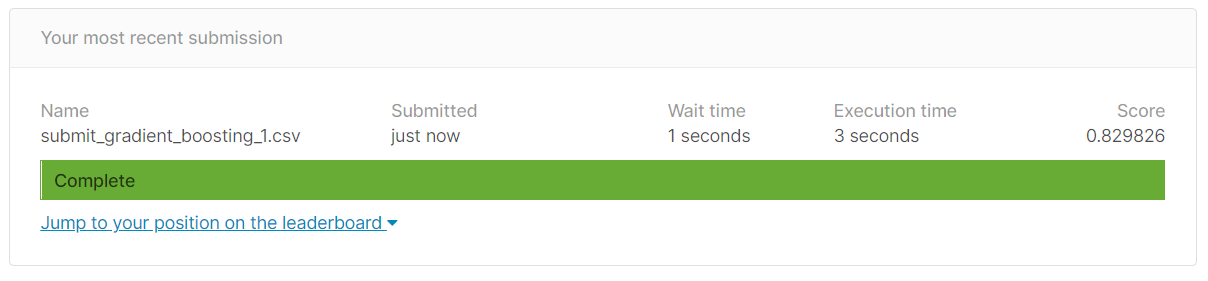
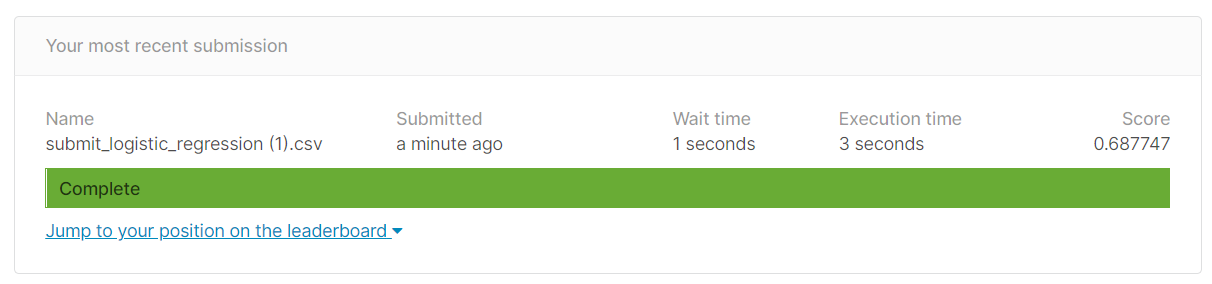

### Parámetros más importantes

In [74]:
len(importance)

516

In [75]:
puntajes_de_las_columnas = {}
count = 1

# summarize feature importance
for i,v in enumerate(importance):
    print(count, ' - Columna', columnas_sin_isFraud_y_sin_TransactionID[i], '  -  Score: %.5f' % (v))
    #puntajes_de_las_columnas.append((columnas_sin_isFraud_y_sin_TransactionID[i], v))
    #puntajes_de_las_columnas.update({v: columnas_sin_isFraud_y_sin_TransactionID[i]})
    puntajes_de_las_columnas.update({columnas_sin_isFraud_y_sin_TransactionID[i] : v})
    
    count = count+1

1  - Columna TransactionDT   -  Score: 0.00075
2  - Columna TransactionAmt   -  Score: 0.00246
3  - Columna card1   -  Score: 0.00022
4  - Columna card2   -  Score: 0.00628
5  - Columna card3   -  Score: 0.01010
6  - Columna card5   -  Score: 0.00000
7  - Columna addr1   -  Score: 0.00476
8  - Columna addr2   -  Score: 0.00000
9  - Columna dist1   -  Score: 0.00000
10  - Columna dist2   -  Score: 0.00093
11  - Columna P_emaildomain   -  Score: 0.00745
12  - Columna R_emaildomain   -  Score: 0.00130
13  - Columna C1   -  Score: 0.07264
14  - Columna C2   -  Score: 0.00000
15  - Columna C3   -  Score: 0.00000
16  - Columna C4   -  Score: 0.00000
17  - Columna C5   -  Score: 0.00000
18  - Columna C6   -  Score: 0.00000
19  - Columna C7   -  Score: 0.06162
20  - Columna C8   -  Score: 0.00106
21  - Columna C9   -  Score: 0.00000
22  - Columna C10   -  Score: 0.01366
23  - Columna C11   -  Score: 0.00389
24  - Columna C12   -  Score: 0.00169
25  - Columna C13   -  Score: 0.11345
26  - Colum

In [76]:
puntajes_de_las_columnas

{'TransactionDT': 0.0007462197224349861,
 'TransactionAmt': 0.0024621701774052134,
 'card1': 0.00022351194977417112,
 'card2': 0.0062826204261361195,
 'card3': 0.010101590388362105,
 'card5': 1.50346152310334e-13,
 'addr1': 0.004756932820647849,
 'addr2': 3.1454921433224224e-06,
 'dist1': 0.0,
 'dist2': 0.0009261764058142925,
 'P_emaildomain': 0.007454782900907739,
 'R_emaildomain': 0.0012969951831260861,
 'C1': 0.07263820231144406,
 'C2': 0.0,
 'C3': 0.0,
 'C4': 0.0,
 'C5': 0.0,
 'C6': 0.0,
 'C7': 0.06161786959832209,
 'C8': 0.0010603509350438306,
 'C9': 0.0,
 'C10': 0.013662806441317772,
 'C11': 0.003893815079113688,
 'C12': 0.0016922570763452651,
 'C13': 0.11345377977118275,
 'C14': 0.02267069669651455,
 'D1': 0.0,
 'D2': 0.00027635076250867466,
 'D3': 0.0,
 'D4': 0.0,
 'D5': 0.0,
 'D6': 0.0017649715617613184,
 'D7': 0.0,
 'D8': 0.0012851822242095916,
 'D9': 0.0,
 'D10': 0.0,
 'D11': 0.0,
 'D12': 0.0,
 'D13': 0.0,
 'D14': 0.0,
 'D15': 0.0,
 'V1': 0.0,
 'V2': 0.0,
 'V3': 0.0,
 'V4': 

In [77]:
len(puntajes_de_las_columnas.keys())

516

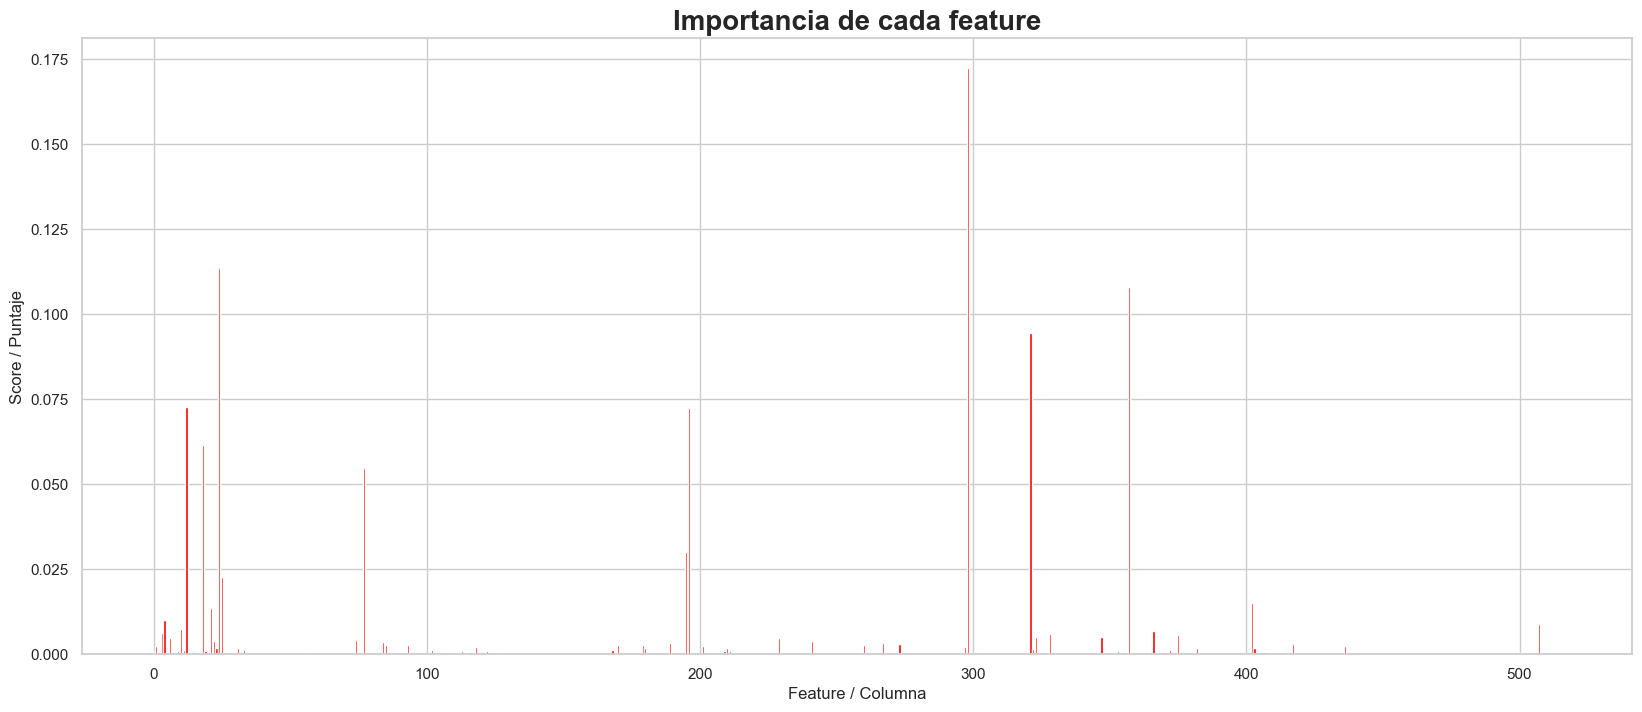

In [78]:
# plot feature importance
fig = plt.figure(figsize = (20, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

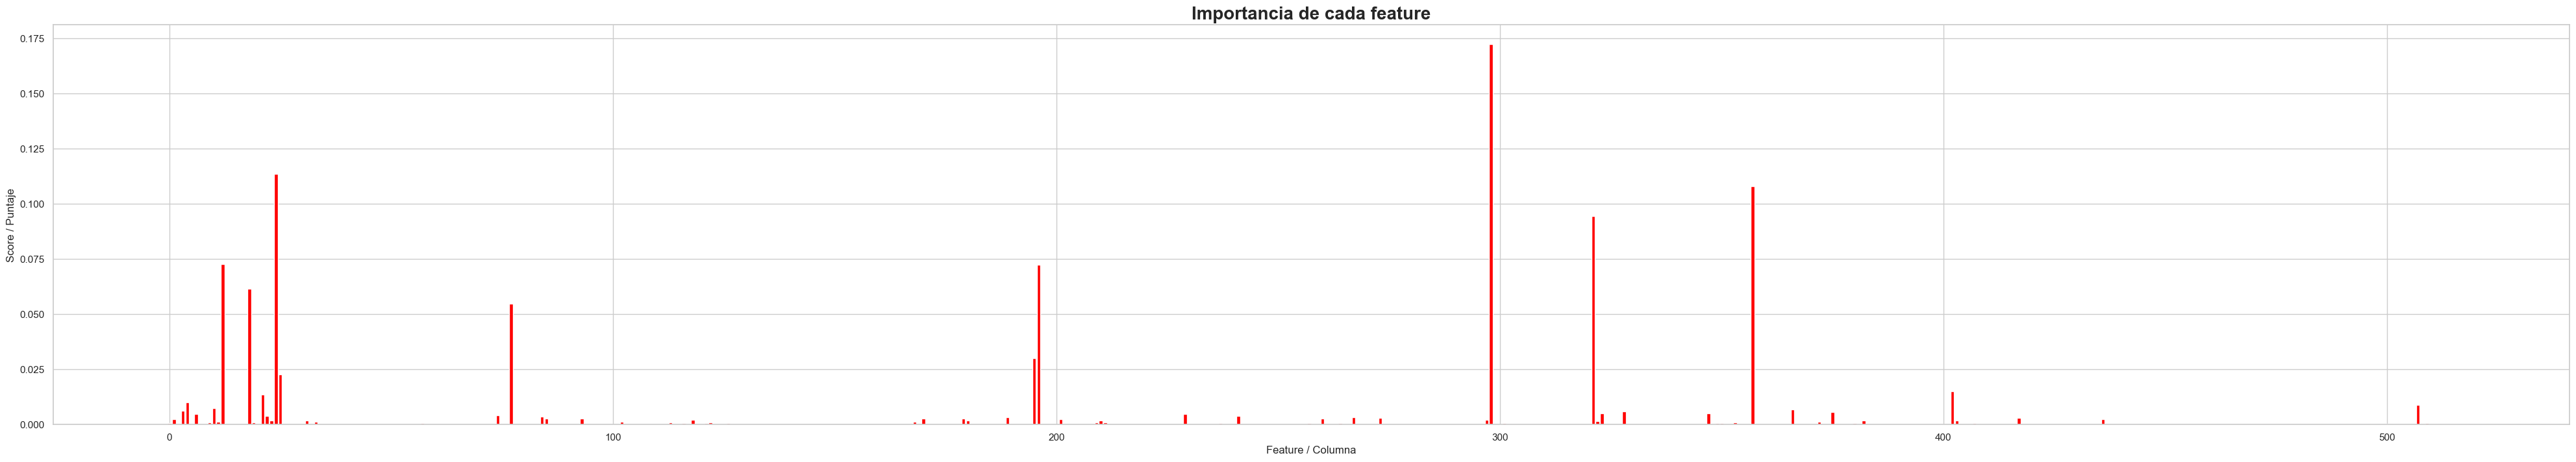

In [79]:
# plot feature importance
fig = plt.figure(figsize = (50, 8))
plt.bar([x for x in range(len(importance))], importance, color ='red')
plt.xlabel("Feature / Columna")
plt.ylabel("Score / Puntaje")
plt.title("Importancia de cada feature", weight = 'bold', size = 20)
plt.show()

In [80]:
parametros_ordenados = pd.DataFrame.from_dict(puntajes_de_las_columnas, orient='index')
parametros_ordenados

,0
TransactionDT,0.00
TransactionAmt,0.00
card1,0.00
card2,0.01
card3,0.01
...,...
samsung,0.00
sm,0.00
trident,0.00
windows,0.00


In [81]:
parametros_ordenados = parametros_ordenados.reset_index()
parametros_ordenados

,index,0
0,TransactionDT,0.00
1,TransactionAmt,0.00
2,card1,0.00
3,card2,0.01
4,card3,0.01
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [82]:
parametros_ordenados.rename(columns={'index': 'parametro', parametros_ordenados.columns[1]: 'puntaje'},inplace=True)
parametros_ordenados

,parametro,puntaje
0,TransactionDT,0.00
1,TransactionAmt,0.00
2,card1,0.00
3,card2,0.01
4,card3,0.01
...,...,...
511,samsung,0.00
512,sm,0.00
513,trident,0.00
514,windows,0.00


In [83]:
parametros_ordenados = parametros_ordenados.sort_values(by=['puntaje'])
parametros_ordenados

,parametro,puntaje
515,r16nw,0.00
294,V254,0.00
293,V253,0.00
292,V252,0.00
291,V251,0.00
...,...,...
12,C1,0.07
321,V281,0.09
357,V317,0.11
24,C13,0.11


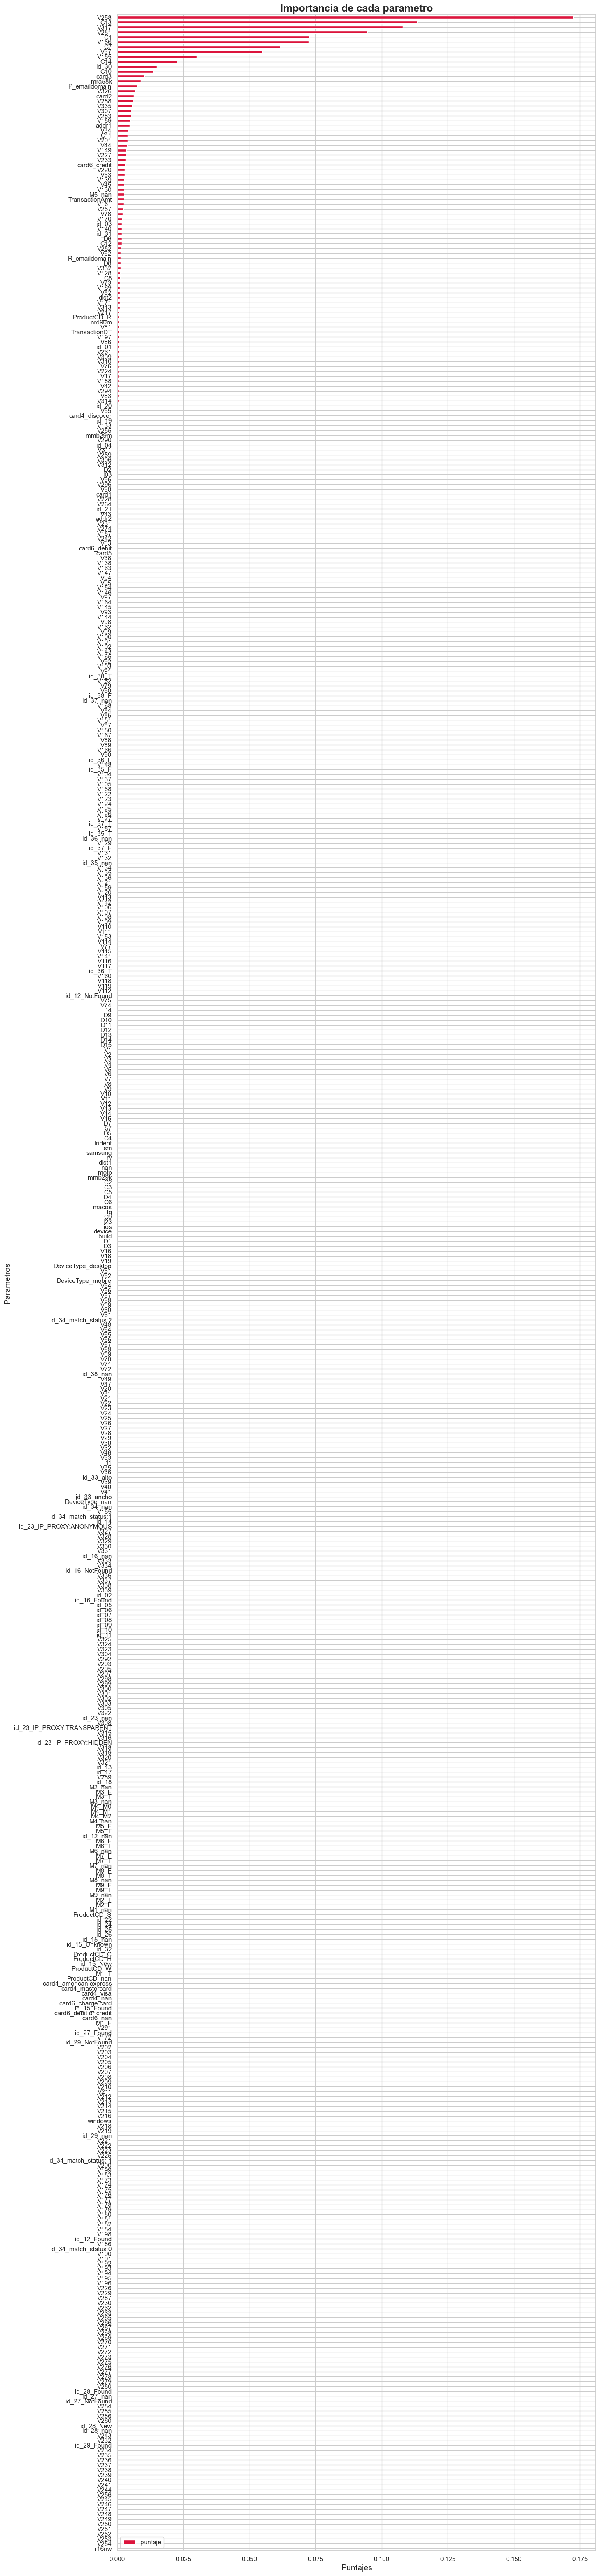

In [84]:
parametros_ordenados.plot.barh("parametro","puntaje",  rot = 0, color = 'crimson', figsize=(15,80))
plt.xlabel('Puntajes', size = 14)
plt.ylabel('Parametros', size = 14)
#plt.legend(("Importancia de cada parametro"),loc="lower right")
plt.title('Importancia de cada parametro', fontweight='bold', size = 18)
plt.show()

A partir de este gráfico se puede suponer que los parámetros más importantes son: V258, C13, V317, V281 y C1.

### Búsqueda de hiperparámetros

A partir de los resultados obtenidos en el otro archivo:

In [85]:
print('Parametros usados en el modelo:\n')
print(gb_model_1.get_params())

Parametros usados en el modelo:

{'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 1.0, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'n_iter_no_change': None, 'random_state': 0, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 100, 'warm_start': False}


In [98]:
from sklearn.model_selection import RandomizedSearchCV

# learning_rate
learning_rate = [float(x) for x in np.linspace(0, 1, num = 11)]

# Number of boosting stages to perform
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 300, num = 10)]

# subsample
subsample = [float(x) for x in np.linspace(0, 1, num = 11)]

# Loss function
loss = ['deviance', 'exponential']

# Maximum depth of the individual regression estimators
max_depth = [int(x) for x in np.linspace(1, 5, num = 5)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]


# Create the random grid
random_grid = {'learning_rate': learning_rate,
               'n_estimators': n_estimators,
               'subsample': subsample,
               'loss': loss,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)

{'learning_rate': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], 'n_estimators': [50, 77, 105, 133, 161, 188, 216, 244, 272, 300], 'subsample': [0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0], 'loss': ['deviance', 'exponential'], 'max_depth': [1, 2, 3, 4, 5, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [99]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
gb = GradientBoostingClassifier()

# Random search of parameters, using 3 fold cross validation, 

# search across 100 different combinations, and use all available cores
gb_random = RandomizedSearchCV(estimator = gb, param_distributions = random_grid, verbose=300, random_state=0)

# Fit the random search model
gb_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START learning_rate=0.5, loss=exponential, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=216, subsample=0.2
[CV 1/5; 1/10] END learning_rate=0.5, loss=exponential, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=216, subsample=0.2;, score=0.975 total time=10.7min
[CV 2/5; 1/10] START learning_rate=0.5, loss=exponential, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=216, subsample=0.2
[CV 2/5; 1/10] END learning_rate=0.5, loss=exponential, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=216, subsample=0.2;, score=0.975 total time=10.7min
[CV 3/5; 1/10] START learning_rate=0.5, loss=exponential, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=216, subsample=0.2
[CV 3/5; 1/10] END learning_rate=0.5, loss=exponential, max_depth=3, min_samples_leaf=4, min_samples_split=10, n_estimators=216, subsample=0.2;, score=0

RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                   param_distributions={'learning_rate': [0.0, 0.1, 0.2,
                                                          0.30000000000000004,
                                                          0.4, 0.5,
                                                          0.6000000000000001,
                                                          0.7000000000000001,
                                                          0.8, 0.9, 1.0],
                                        'loss': ['deviance', 'exponential'],
                                        'max_depth': [1, 2, 3, 4, 5, None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 77, 105, 133, 161,
                                                         188, 216, 244, 272,
                                     

In [100]:
mejores_parametros = gb_random.best_params_
mejores_parametros

{'subsample': 1.0,
 'n_estimators': 105,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_depth': None,
 'loss': 'exponential',
 'learning_rate': 0.9}

Se usaron estos resultados en el otro notebook.